# Python Use Case Annual Water Usage in Baltimore Dataset

The problem is to predict annual water usage.

The dataset is using 'Water.csv'.

The dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.

The values are in the units of liters per capita per day, and there are 79 observations.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF Test
from statsmodels.tsa.stattools import adfuller

# ARIMA Analysis
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Import Dataset

In [2]:
data=pd.read_csv('Water.csv') #Parse_dates : get format datetime of year
data.head()
#parse_dates=[0]

,Year,Baltmore city annual water use
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
Year                              79 non-null int64
Baltmore city annual water use    79 non-null int64
dtypes: int64(2)
memory usage: 1.3 KB


### Dimension of Data

In [4]:
data.shape

(79, 2)

### Split data into two

Because time series data with ordered ranges, to divide the data into two parts is to divide the ordered data 70 is a dataset and 9 data is a validation. 

In [5]:
#Split data
#Dataset data
dataset=data[0:70]

#Validation data
validation=data[70:]

In [6]:
print(dataset.shape)
print(validation.shape)

(70, 2)
(9, 2)


**Save data which have been split to directory in csv format**

In [7]:
#Save dataset data
dataset.to_csv(r'C:\Users\faizah064287\Documents\Data Scientist Boothcamp\Python\Untitled Folder\dataset.csv')

#Save validation data
validation.to_csv(r'C:\Users\faizah064287\Documents\Data Scientist Boothcamp\Python\Untitled Folder\validation.csv')

### 2. Get Summary of Dataset

In [8]:
dataset=pd.read_csv('dataset.csv')

#Because of dataset contain duplicate index named : 'Unnamed:0' so next step is drop the column
dataset = dataset.drop(['Unnamed: 0'], axis=1) 

dataset.head()

,Year,Baltmore city annual water use
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [9]:
dataset.tail()

,Year,Baltmore city annual water use
65,1950,575
66,1951,564
67,1952,549
68,1953,538
69,1954,568


In [10]:
# Get Information from summary dataset

dataset.describe()

,Year,Baltmore city annual water use
count,70.000000,70.000000
mean,1919.500000,501.442857
std,20.351085,73.806766
min,1885.000000,344.000000
25%,1902.250000,458.000000
50%,1919.500000,496.000000
75%,1936.750000,546.250000
max,1954.000000,662.000000


From it, we will know that mean of annual water in Baltimore is 471.580000 liters per capita per day, minimal water which usage in Baltimore is 344 liters and maximum water which usage in Baltimore is 662 liters from 1885 - 1954.

### 3. Time Series plot of Dataset

In this step, creating model time series analysis using 'dataset.csv'.

**Set 'Year' of Index in Dataset**

In [11]:
#Get Index of Year in dataset 

dataset=dataset.set_index('Year')

Objection of index is cause 'Year' must detect as index and ignore if we want create plot time series.

**Plot of time series dataset**

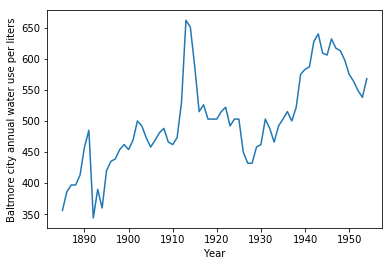

In [12]:
plt.xlabel('Year')
plt.ylabel('Baltmore city annual water use per liters')
plt.plot(dataset)

The plot dataset shows that the amount of water used in Baltimore fluctuates, sometimes the amount of water used is large and the use of water is small.

Some observations from the plot include:

- There looks to be an increasing trend in water usage over time.
- There do not appear to be any obvious outliers, although there are some large fluctuations.
- There is a downward trend for the last few years of the series.


### 4. Group data by decade

In [13]:
data=data.set_index('Year')

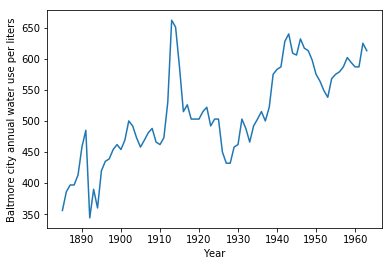

In [14]:
plt.xlabel('Year')
plt.ylabel('Baltmore city annual water use per liters')
plt.plot(data)

In this step I, see insight for every 10 years(decade) is look for the plot. It appears that every 10 years, the data series has a different summary statistics because the data fluctuates all the time. For the early years, the use of water was still low, then it continued to increase over time.

### 5. ARIMA

In this step, Using ARIMA(p,d,q).

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

Analysis of the time series data assumes that we are working with a stationary time series.

The time series is likely non-stationary. Make it stationary by first differencing the series and using a statistical test to confirm that the result is stationary.

### Split dataset into train and test

In [15]:
# Split dataset into train and test with proportion 50%, 50%
X = dataset
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [16]:
#Get Dimension of data train and test
print(train.shape)
print(test.shape)

(35, 1)
(35, 1)


Step above is split dataset.csv into data train and test with proportion 50% and 50%. So, we can see that data train contains 35 rows of data and data test contains 35 rows of data.

In [17]:
train.head()

,Baltmore city annual water use
Year,
1885,356.0
1886,386.0
1887,397.0
1888,397.0
1889,413.0


### Plot of data train to use time series analysis

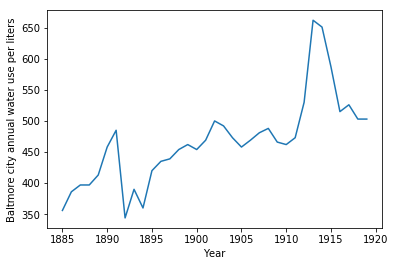

In [18]:
plt.xlabel('Year')
plt.ylabel('Baltmore city annual water use per liters')
plt.plot(train)

## Checking Stationarity in Variance and Mean

**Rolling Statistics**

Rolling Statistics is used to check stationarity in variance and mean of data train with plot.

In [19]:
#Rolling Statistics
#Determing rolling statistics

rolmean = train.rolling(window=12).mean()

rolstd = train.rolling(window=12).std()
print(rolmean, rolstd)

      Baltmore city annual water use
Year                                
1885                             NaN
1886                             NaN
1887                             NaN
1888                             NaN
1889                             NaN
1890                             NaN
1891                             NaN
1892                             NaN
1893                             NaN
1894                             NaN
1895                             NaN
1896                      403.416667
1897                      410.333333
1898                      416.000000
1899                      421.416667
1900                      426.166667
1901                      430.833333
1902                      434.333333
1903                      434.916667
1904                      445.666667
1905                      451.333333
1906                      460.416667
1907                      465.500000
1908                      469.916667
1909                      472.166667
1

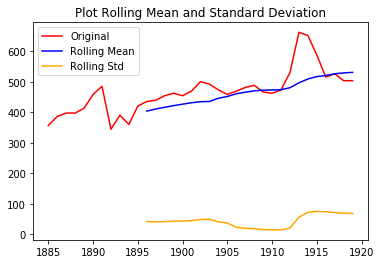

In [20]:
# Plot Rolling Statistics
original=plt.plot(train, color='red', label='Original')
mean=plt.plot(rolmean, color='blue', label='Rolling Mean')
std=plt.plot(rolstd, color='orange', label='Rolling Std')
plt.legend(loc='best')
plt.title('Plot Rolling Mean and Standard Deviation')
plt.show(block=False)

Objection of Rolling statistics  is checking the stationarity of data on the mean and standar deviation using a plot.
From the results of the rolling plot mean and standard deviation above, it can be seen that the data train is not stationary about the mean and variance. Because the mean looks up and the variance is still fluctuating. So, stationarity needs to be done.

To further augment our hypothesis that the time series is not stationary, let us perform the ADF TEST.

**Uji ADF TEST**

To test whether the data train is stationary in mean can be done with the ADF test where later testing is done with p-value. Thus, the conclusions of stationarity data are more certain.

In [21]:
#Uji ADF test
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(train['Baltmore city annual water use'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.156197
p-value                         0.222526
#Lags Used                      1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


Diatas merupakan output hasil uji ADF test. Uji ADF test digunakan untuk apakah data stationer terhadap mean atau tidak.

1. Uji Hipotesis
    H0 : Data tidak stationer terhadap mean
    H1 : Data stationer terhadap mean
2. Tingkat signifikansi
    alpha = 5%
3. Statistik Uji
    p-value = 0.222526
4. Daerah Kritik
    H0 ditolak jika p-value < alpha
5. Kesimpulan
    Karena nilai p-value = 0.222526 > alpha = 0.05 maka H0 tidak ditolak sehingga dapat disimpulkan bahwa data tidak stationer terhadap mean.

Dari kesimpulan uji diatas maka data tidak stationer terhadap mean, dan dari hasil plot rolling statistics tadi terlihat juga data belum stationer terhadap variansi sehingga data 'annual water in baltimore' ini belum stationer dalam mean dan variansi. Maka, pada analisis model time series selanjutnya adalah melakukan stationaritas data dengan mengambil differencing dan transformasi.

From testing using Rolling Statistics and ADF TEST, it can be concluded that dataset above is not stationary. So, the next step is to do differencing data to make the stationarity data of the mean and then check again using the ADF TEST whether the assumptions of mean and variance have been fulfilled.

**Differencing Transfrom data train**

Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.

Differencing is performed by subtracting the previous observation from the current observation. 

diff(t) = obs(t) -  obs(t-1)


From the above formula, data will be excluded in the first row because the differencing results are not filled in, because it is differencing transform starting from the second row of data, so it needs to be done dropping rows containing the value 'Null'.


In [22]:
#Differencing data

diff = train.diff()
diff= diff.dropna()
diff.head()

,Baltmore city annual water use
Year,
1886,30.0
1887,11.0
1888,0.0
1889,16.0
1890,45.0


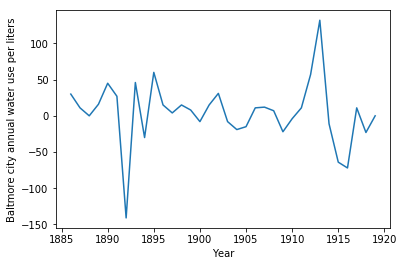

In [23]:
plt.xlabel('Year')
plt.ylabel('Baltmore city annual water use per liters')
plt.plot(diff)

After differencing method, Next step is Uji ADF Test and Rolling Statistics for checking stationarity in Mean and Variance which have been fulfilled.

### Uji ADF Test

In [24]:
#Uji ADF test
#Perform Dickey-Fuller test:

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(diff['Baltmore city annual water use'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -4.159039
p-value                         0.000772
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


Diatas merupakan output hasil uji ADF test. Uji ADF test digunakan untuk apakah data stationer terhadap mean atau tidak.

1. Uji Hipotesis
    H0 : Data tidak stationer terhadap mean
    H1 : Data stationer terhadap mean
2. Tingkat signifikansi
    alpha = 5%
3. Statistik Uji
    p-value = 0.000772
4. Daerah Kritik
    H0 ditolak jika p-value < alpha
5. Kesimpulan
    Karena nilai p-value = 0.000772 < alpha = 0.05 maka H0 ditolak sehingga dapat disimpulkan bahwa data stationer terhadap mean.

In [25]:
#Rolling Statistics
#Determing rolling statistics

rolmean = diff.rolling(window=12).mean()

rolstd = diff.rolling(window=12).std()
print(rolmean, rolstd)

      Baltmore city annual water use
Year                                
1886                             NaN
1887                             NaN
1888                             NaN
1889                             NaN
1890                             NaN
1891                             NaN
1892                             NaN
1893                             NaN
1894                             NaN
1895                             NaN
1896                             NaN
1897                        6.916667
1898                        5.666667
1899                        5.416667
1900                        4.750000
1901                        4.666667
1902                        3.500000
1903                        0.583333
1904                       10.750000
1905                        5.666667
1906                        9.083333
1907                        5.083333
1908                        4.416667
1909                        2.250000
1910                        0.666667
1

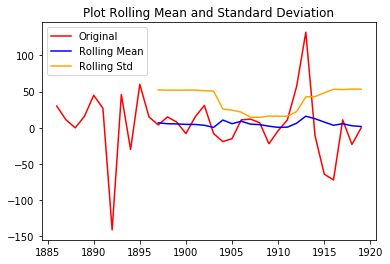

In [26]:
# Plot Rolling Statistics
original=plt.plot(diff, color='red', label='Original')
mean=plt.plot(rolmean, color='blue', label='Rolling Mean')
std=plt.plot(rolstd, color='orange', label='Rolling Std')
plt.legend(loc='best')
plt.title('Plot Rolling Mean and Standard Deviation')
plt.show(block=False)

Dari kesimpulan uji diatas maka data sudah stationer terhadap mean, dan dari hasil plot rolling statistics tadi terlihat juga data sudah stationer terhadap variansi sehingga data 'annual water in baltimore' ini sudah stationer dalam mean dan variansi. Maka, pada analisis model time series selanjutnya menggunakan data yang telah di diferencing satu kali. Sehingga, didapatkan d=1.

### ARIMA(p,d,q)

**Get Parameters p and q with ACF, PACF plot**

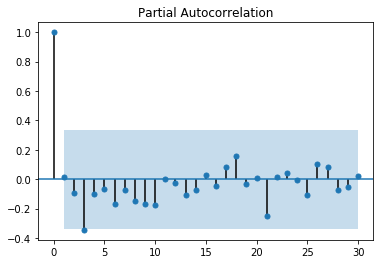

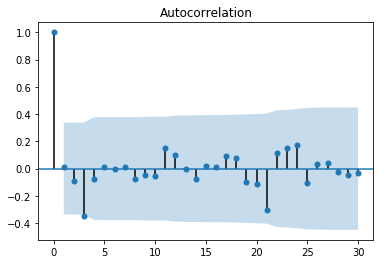

In [27]:
#Get plot Plot PACF and ACF to get order of p and q in Arima time series analysis.

#Plot PACF
#Gt order of p from lags 
plot_pacf(diff, lags=30)

#Plot acf of q from lags 
plot_acf(diff, lags=30)
plt.show()

Below are some observations from the plots.

- The ACF (q) shows no significant lags .
- The PACF (p) also shows no significant lags.
- A good starting point for the p and q values is also 0.

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1885 to 1919
Data columns (total 1 columns):
Baltmore city annual water use    35 non-null float32
dtypes: float32(1)
memory usage: 420.0 bytes


**ARIMA MODEL (0,1,0)**

In [29]:
# Prepare Data of dataset
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [30]:
# Walk-forward Validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Actual=%3.f' % (yhat, obs))

>Predicted=507.324, Actual=503
>Predicted=507.200, Actual=515
>Predicted=519.417, Actual=522
>Predicted=526.486, Actual=492
>Predicted=495.579, Actual=503
>Predicted=506.769, Actual=503
>Predicted=506.675, Actual=450
>Predicted=452.293, Actual=432
>Predicted=433.810, Actual=432
>Predicted=433.767, Actual=458
>Predicted=460.318, Actual=462
>Predicted=464.356, Actual=503
>Predicted=506.196, Actual=488
>Predicted=490.809, Actual=466
>Predicted=468.292, Actual=492
>Predicted=494.776, Actual=503
>Predicted=505.940, Actual=515
>Predicted=518.118, Actual=500
>Predicted=502.769, Actual=522
>Predicted=525.132, Actual=575
>Predicted=579.056, Actual=583
>Predicted=587.127, Actual=587
>Predicted=591.125, Actual=628
>Predicted=632.772, Actual=640
>Predicted=644.897, Actual=609
>Predicted=613.288, Actual=606
>Predicted=610.167, Actual=632
>Predicted=636.525, Actual=617
>Predicted=621.210, Actual=613
>Predicted=617.079, Actual=598
>Predicted=601.781, Actual=575
>Predicted=578.369, Actual=564
>Predict

In [31]:
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 22.772


### Validation Model using validation data

In [32]:
validation=pd.read_csv('validation.csv')

#Because of dataset contain duplicate index named : 'Unnamed:0' so next step is drop the column
validation = validation.drop('Unnamed: 0', axis=1) 

In [33]:
validation=validation.set_index('Year')

In [34]:
# load and prepare datasets for validation
X = dataset.values.astype('float32')
history = [x for x in X]
y = validation.values.astype('float32')
predictions = list()
for i in range(len(y)):
    # predict
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Actual=%3.f' % (yhat, obs))

>Predicted=571.072, Actual=575
>Predicted=578.129, Actual=579
>Predicted=582.141, Actual=587
>Predicted=590.208, Actual=602
>Predicted=605.370, Actual=594
>Predicted=597.216, Actual=587
>Predicted=590.080, Actual=587
>Predicted=590.039, Actual=625
>Predicted=628.494, Actual=613


In [35]:
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 14.469


The final RMSE for the validation period is predicted at 14.5 liters per capita per day. This is not too different from the expected error of 22, but I would expect that it is also not too different from a simple persistence model.

**A plot of the predictions compared to the validation dataset is also provided**

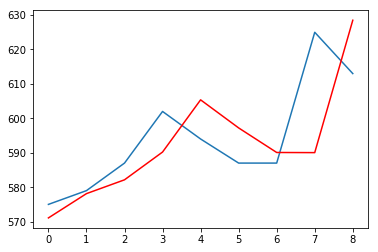

In [36]:
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()

## Summary

- This time series analysis is used dataset water usage in Baltimore liters per capita per days
- Data 'Water.csv' is split into two data, one for model development (dataset.csv) and other for validation (validation.csv) with number of rows is 70 and 9.
- Then 'dataset.csv' split again into train and test sets with proportion 50% for model development.
- Using train sets get ARIMA(p,d,q) = ARIMA(0,1,0) from looking at the characteristics of the data as well as the ACF and PACF plots.
- Then with ARIMA(0,1,0) data test is used to training dataset and get RMSE = 22.772.
- After it, get validation model using 'validation.csv' and get RMSE = 14.469.
- The forecast does have the characteristics of a persistence forecast. This suggests that although this time series does have an obvious trend, it is still a reasonably difficult problem.
- This model can be re-evaluated to get the smallest RMSE.